
# **Klasifikasi Kualitas Air Minum menggunakan Penerapan Algoritma Machine Learning**

# **Tujuan**
Untuk mengklasifikasikan sampel air yang dapat diminum atau tidak dapat diminum berdasarkan fitur yang disediakan.

File water_potability.csv berisi metrik kualitas air untuk 3276 badan air yang berbeda.
1. pH: Ph merupakan parameter penting dalam mengevaluasi keseimbangan asam-basa air. Ini juga merupakan indikator kondisi asam atau basa status air. WHO telah merekomendasikan batas maksimum pH yang diizinkan dari 6,5 hingga 8,5. Rentang investigasi saat ini adalah 6,52-6,83 yang berada dalam kisaran standar WHO.
2. Hardness: Kekerasan terutama disebabkan oleh garam kalsium dan magnesium. Garam-garam ini larut dari endapan geologis yang dilalui air. Lamanya waktu kontak air dengan bahan penghasil kesadahan membantu menentukan berapa banyak kesadahan yang ada dalam air baku. Kekerasan awalnya didefinisikan sebagai kapasitas air untuk mengendapkan sabun yang disebabkan oleh Kalsium dan Magnesium.
3. Solids (Total padatan terlarut - TDS): Air memiliki kemampuan untuk melarutkan berbagai anorganik dan beberapa mineral atau garam organik seperti kalium, kalsium, natrium, bikarbonat, klorida, magnesium, sulfat, dll. Mineral ini menghasilkan rasa yang tidak diinginkan dan warna yang encer dalam penampilan air. Ini adalah parameter penting untuk penggunaan air. Air dengan nilai TDS yang tinggi menunjukkan bahwa air tersebut sangat termineralisasi. Batas yang diinginkan untuk TDS adalah 500 mg/l dan batas maksimum adalah 1000 mg/l yang ditentukan untuk tujuan minum.
4. Chloramines: Klorin dan kloramin adalah disinfektan utama yang digunakan dalam sistem air publik. Kloramin paling sering terbentuk ketika amonia ditambahkan ke klorin untuk mengolah air minum. Kadar klorin hingga 4 miligram per liter (mg/L atau 4 bagian per juta (ppm)) dianggap aman dalam air minum.
5. Sulfate: Sulfat adalah zat alami yang ditemukan di mineral, tanah, dan batuan. Mereka hadir di udara ambien, air tanah, tanaman, dan makanan. Penggunaan komersial utama sulfat adalah dalam industri kimia. Konsentrasi sulfat dalam air laut adalah sekitar 2.700 miligram per liter (mg/L). Ini berkisar antara 3 sampai 30 mg/L di sebagian besar persediaan air tawar, meskipun konsentrasi yang jauh lebih tinggi (1000 mg/L) ditemukan di beberapa lokasi geografis.
6. Conductivity: Air murni bukanlah penghantar arus listrik yang baik, melainkan isolator yang baik. Peningkatan konsentrasi ion meningkatkan konduktivitas listrik air. Umumnya, jumlah padatan terlarut dalam air menentukan konduktivitas listrik. Konduktivitas listrik (EC) sebenarnya mengukur proses ionik suatu larutan yang memungkinkannya mentransmisikan arus. Menurut standar WHO, nilai EC tidak boleh melebihi 400 S/cm.
7. Organic_carbon: Total Organic Carbon (TOC) di perairan sumber berasal dari bahan organik alami (NOM) yang membusuk serta sumber sintetis. TOC adalah ukuran jumlah total karbon dalam senyawa organik dalam air murni. Menurut US EPA < 2 mg/L sebagai TOC dalam air olahan/minum, dan < 4 mg/Lit pada air sumber yang digunakan untuk pengolahan.
8. Trihalomethanes: THM adalah bahan kimia yang dapat ditemukan dalam air yang diolah dengan klorin. Konsentrasi THM dalam air minum bervariasi sesuai dengan tingkat bahan organik di dalam air, jumlah klorin yang dibutuhkan untuk mengolah air, dan suhu air yang diolah. Kadar THM hingga 80 ppm dianggap aman dalam air minum.
9.Turbidity: Kekeruhan air tergantung pada jumlah zat padat yang ada dalam keadaan tersuspensi. Ini adalah ukuran sifat pemancar cahaya air dan tes ini digunakan untuk menunjukkan kualitas pembuangan limbah sehubungan dengan materi koloid. Nilai rata-rata kekeruhan yang diperoleh untuk Kampus Wondo Genet (0,98 NTU) lebih rendah dari nilai rekomendasi WHO sebesar 5,00 NTU.
10. Potability: Menunjukkan jika air aman untuk konsumsi manusia di mana 1 berarti Dapat Diminum dan 0 berarti Tidak dapat diminum.

# **Expolaratory Data Analysis**
Expolaratory Data Analysis adalah suatu proses uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi.

# **Import Libraries**

Melakukan import library yang dibutuhkan dalam membangun model KNN dengan EDA pada klasifikasi kualitas air.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# **Loading Data**
Proses membaca data yang sudah disimpan dalam repo, data diambil dari link kaggle.

In [2]:
# Import Data to Google Colab
from google.colab import drive
drive.mount('/content/gdrive')
data =  pd.read_csv('/content/gdrive/My Drive/SEMESTER 4/AI/water_potability.csv', sep = ',')
data
# Show the Data
data.head(16)

Mounted at /content/gdrive


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [3]:
data.shape

(3276, 10)

#**EDA**

In [4]:
# Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# Check for missing data
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Bisa dilihat bahwa terdapat missing value pada pH, Sulfate, dan trihalomethanes dan masing-masing memiliki missing value sebanyak 491, 781, dan 162. Jadi harus dilakukan beberapa analisis lebih lanjut untuk mencari tahu dengan apa kami harus mengganti data itu.

39.01 % of samples are potable (1)
Non potable (0): 1998
Potable (1): 1278


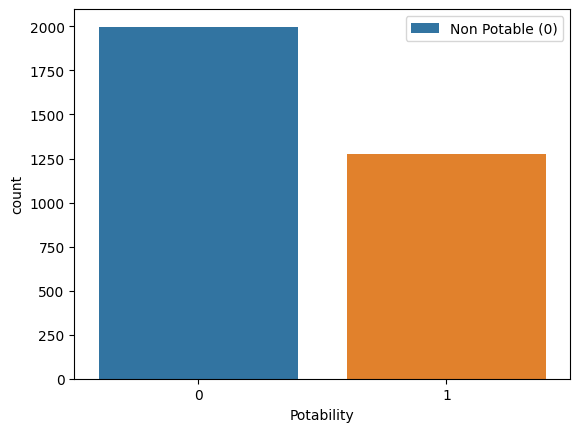

In [6]:
# Count distribution of target variable
sns.countplot(x=data["Potability"], label= 'Non Potable (0)')
plt.legend()
print(f'{data.Potability[data.Potability==1].count()/data.Potability.count()*100:.2f} % of samples are potable (1)')
print('Non potable (0):',data.Potability.value_counts()[0])
print('Potable (1):',data.Potability.value_counts()[1])

Pada grafik diatas 39.01% pada sampel data itu Potable. Sehingga pada sampel data non Potable lebih mendominasi.

<Axes: >

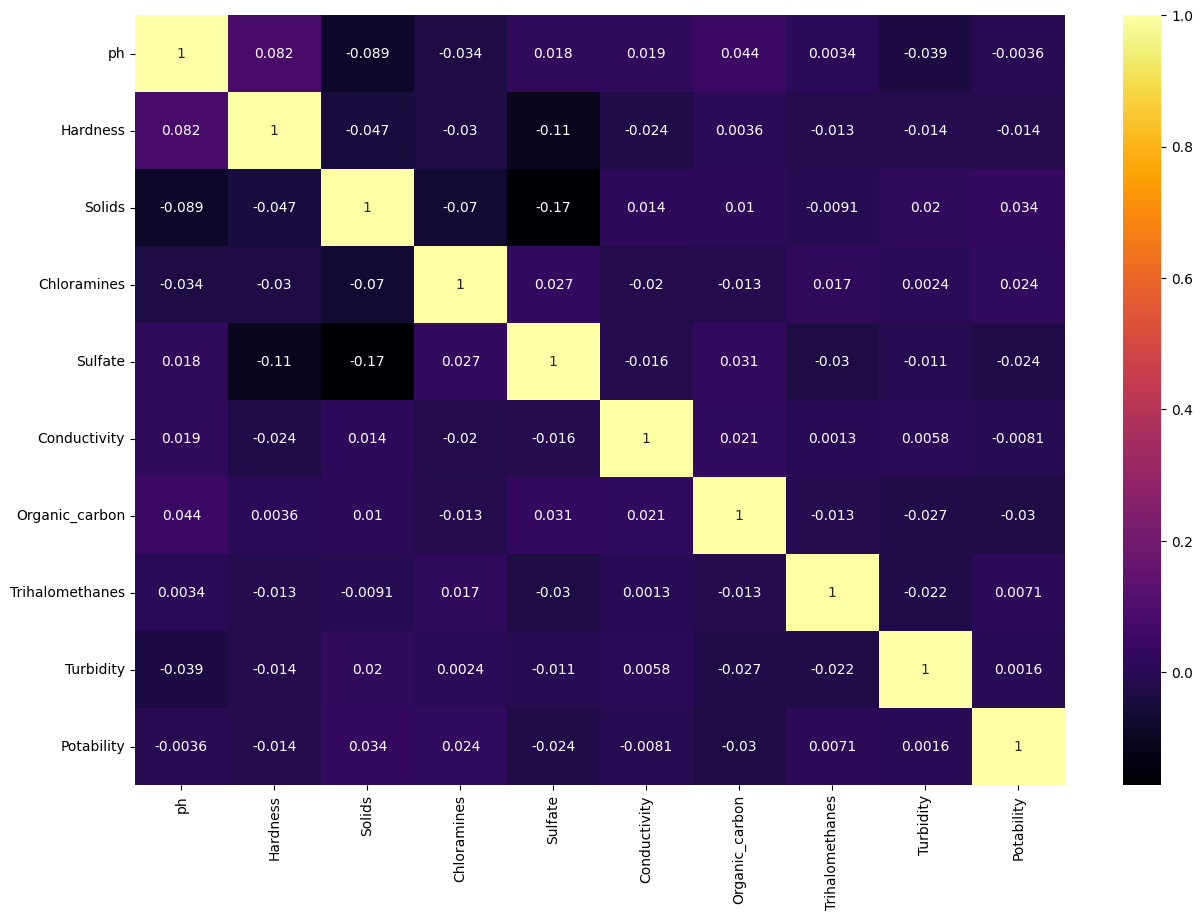

In [7]:
# Correlation matrix for dataset
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap="inferno")

Nilai korelasi yang dihasilkan terlalu rendah maka tidak dapat mengidentifikasi hubungan yang jelas antar variabel.

In [8]:
def fill_nan(df):
    for index, column in enumerate(df.columns[:9]):
        # print(index, column)
        df[column] = df[column].fillna(df.groupby('Potability')[column].transform('mean'))
    return df

df = fill_nan(data)

df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Terlihat jelas bahwa sudah tidak terjadi missing value.

In [9]:
# Analyse statically insight of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080855,1.469958,0.000000,6.277673,7.085378,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.785123,36.145701,129.000000,317.094638,334.564290,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.395671,15.769901,0.738000,56.647656,66.303555,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


:Nilai Mean diatas yang menggantikan nilai NaN pada pH, Sulfate, dan Trihalomethanes. Maka dihasilkan data baru seperti tabel dibawah ini.

In [10]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.085378,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


Hasil diatas merupakan data terbaru setelah tidak terjadi missing value.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


39.01 % of samples are potable (1)
Non potable (0): 1998
Potable (1): 1278


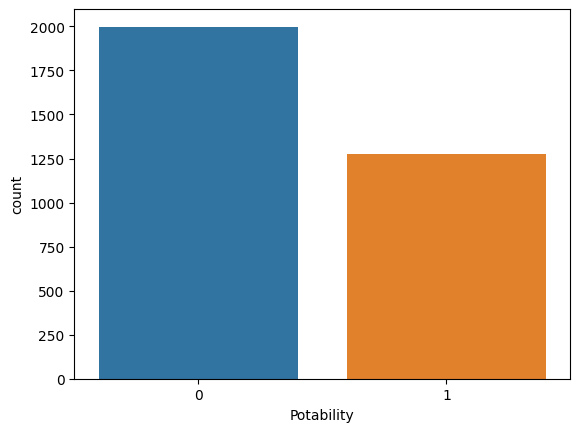

In [12]:
# Count distribution of target variable
sns.countplot(x=data["Potability"])
print(f'{data.Potability[data.Potability==1].count()/data.Potability.count()*100:.2f} % of samples are potable (1)')
print('Non potable (0):',data.Potability.value_counts()[0])
print('Potable (1):',data.Potability.value_counts()[1])

Total data Non Potable dan Potable sesudah dan sebelum data diganti sama yaitu 1998 data Non Potable dan 1278 data Potable.

# **Splitting, balancing and scaling data**

In [13]:
# Splitting
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [14]:
print(X)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.085378  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  334.564290   
2     8.099124  224.236259  19909.541732     9.275884  334.564290   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  332.566990   
3273  9.419510  175.762646  33155.578218     7.350233  332.566990   
3274  5.126763  230.603758  11983.869376     6.303357  332.566990   
3275  7.874671  195.102299  17404.177061     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

In [15]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64


In [16]:
y = df['Potability']
# Balancing data - oversampling minority
smt = SMOTE(random_state=42)
X,y = smt.fit_resample(X, y)

In [17]:
print(X)
print(y)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.085378  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  334.564290   
2     8.099124  224.236259  19909.541732     9.275884  334.564290   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3991  5.342081  185.504575  13662.318053     8.696252  326.772210   
3992  5.306917  171.389580  25862.825287     7.414549  330.051417   
3993  7.227743  151.500852  33773.305669     8.673021  302.028815   
3994  7.123887  180.839143  30280.205950    10.287308  256.656029   
3995  6.491496  248.029219  17693.241882     5.610382  387.506818   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

# MEMBAGI DATA TRAINING (80%) DAN DATA TESTING (20%)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=18, stratify=y) #stratify=y
print(X.shape, X_train.shape, X_test.shape)

(3996, 9) (3196, 9) (800, 9)


# **Pembuatan Model**

In [19]:
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

membuat model evaluasi untuk mengukur tingkat akurasi

In [20]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy =",accuracy)

Accuracy = 0.8025


MELAKUKAN INPUTAN DATA BARU

In [21]:
input_data = (5.0,173.0,33455.0,6.0,351.5,507.0,17.3,62.4,3.96)


In [22]:
input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshape)

prediction2 = model.predict(input_data_reshape)
print(prediction2)


if (prediction2 == 0):
    print('Air Tidak Layak Diminum')
else :
    print('Air Layak Diminum')

[[5.0000e+00 1.7300e+02 3.3455e+04 6.0000e+00 3.5150e+02 5.0700e+02
  1.7300e+01 6.2400e+01 3.9600e+00]]
[1]
Air Layak Diminum


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#Evaluasi Model

Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted')

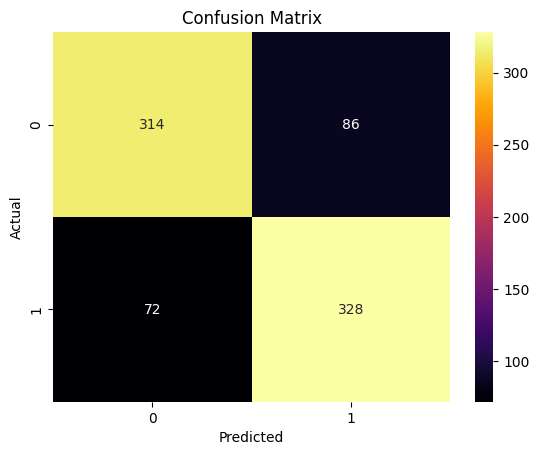

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="inferno")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Classification Report

In [24]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       400
           1       0.79      0.82      0.81       400

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



#simpan model

In [25]:
import pickle

In [26]:
filename = 'air_model1.sav'
pickle.dump(model, open(filename,'wb'))